In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/Users/ankusmanish/Desktop/Training/Datasets/Week 6 data/bank.csv', sep = ';')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [7]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
lis = []
cols = data.columns
for i in cols:
    if data[i].dtype == 'O':
        lis.append(i)

In [9]:
#The list of columns that has categorical values
print(lis)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [10]:
for i in lis:
    print(i.upper())
    print(data[i].value_counts())
    print('-'*100)
    print('-'*100)

JOB
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
MARITAL
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
EDUCATION
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
----------------------------------------------------------------------------------------------------
----------------

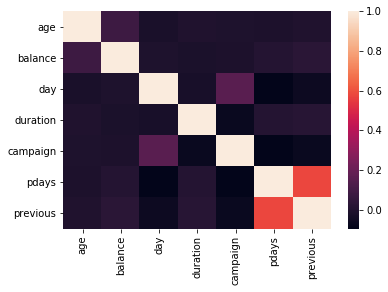

In [11]:
sea.heatmap(data.corr())

In [12]:
outcome = data['y']

In [13]:
data.drop(['job','default','housing','loan','month','poutcome','contact','day','marital','education','y'], axis = 1, inplace = True)

In [14]:
data.head()

,age,balance,duration,campaign,pdays,previous
0,30,1787,79,1,-1,0
1,33,4789,220,1,339,4
2,35,1350,185,1,330,1
3,30,1476,199,4,-1,0
4,59,0,226,1,-1,0


In [15]:
outcome = pd.DataFrame(outcome, columns = ['y'])

In [16]:
outcome.head()

,y
0,no
1,no
2,no
3,no
4,no


In [17]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [18]:
dat = lb.fit_transform(outcome)

In [19]:
outcome = pd.DataFrame(dat, columns = ['y'])

In [20]:
outcome['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [21]:
mod_data = pd.concat([data, outcome], axis = 1)

In [22]:
mod_data.head()

,age,balance,duration,campaign,pdays,previous,y
0,30,1787,79,1,-1,0,0
1,33,4789,220,1,339,4,0
2,35,1350,185,1,330,1,0
3,30,1476,199,4,-1,0,0
4,59,0,226,1,-1,0,0


In [23]:
mod_data.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y'], dtype='object')

In [24]:
data = pd.DataFrame(mod_data, columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y'])

In [25]:
#data = pd.DataFrame(mod_data, columns = ['Ones','age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y'])

In [26]:
#data['Ones'] = 1

In [27]:
data.head()

,age,balance,duration,campaign,pdays,previous,y
0,30,1787,79,1,-1,0,0
1,33,4789,220,1,339,4,0
2,35,1350,185,1,330,1,0
3,30,1476,199,4,-1,0,0
4,59,0,226,1,-1,0,0


In [28]:
X_train, y_train, X_test, y_test = (data.iloc[:4000,:6], data.iloc[:4000,6:7], data.iloc[4000:,:6], data.iloc[4000:,6:7])




In [29]:
#X_train, y_train, X_test, y_test = (data.iloc[:4000,:7], data.iloc[:4000,7:8], data.iloc[4000:,:7], data.iloc[4000:,7:8])




In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 6)
(4000, 1)
(521, 6)
(521, 1)


In [31]:
X_train.head()

,age,balance,duration,campaign,pdays,previous
0,30,1787,79,1,-1,0
1,33,4789,220,1,339,4
2,35,1350,185,1,330,1
3,30,1476,199,4,-1,0
4,59,0,226,1,-1,0


In [32]:
age = X_train['age'].values
balance = X_train['balance'].values
duration = X_train['duration'].values
campaign = X_train['campaign'].values
pdays = X_train['pdays'].values
previous = X_train['previous'].values
y_val = y_train['y'].values

In [33]:
X = np.array([age, balance, duration, campaign, pdays, previous]).T
Y = np.array(y_val)

In [34]:
X.shape

(4000, 6)

In [35]:
Y.shape

(4000,)

In [36]:
alpha = 0.0000001   
m = len(X) 
np.random.seed(10)
theta = np.random.rand(6)  #initializing theta with some random values

In [37]:
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []   #to record all cost values to this list
    prediction_list = []
    iterations = 150000
    for i in range(iterations):
        pred = np.dot(x, theta)   #predicted y values 
        prediction_list.append(pred)
        error = pred - y
        cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]

    return prediction_list, cost_list, theta

In [38]:
prediction_list, cost_list, theta = gradient_descent(X, Y, m, theta, alpha)

In [39]:
print(cost_list[-1]) #the least value of cost fuction

1.8731693294826177


In [40]:
theta

array([-4.09223431e-02,  2.98498464e-06,  5.40762504e-04,  5.99141330e-01,
       -4.89952553e-04,  2.13420557e-01])

In [41]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

In [42]:
age = X_test['age'].values
balance = X_test['balance'].values
duration = X_test['duration'].values
campaign = X_test['campaign'].values
pdays = X_test['pdays'].values
previous = X_test['previous'].values
y_val = y_test['y'].values

In [43]:
x = np.array([age, balance, duration, campaign, pdays, previous]).T
y = np.array(y_val)

In [44]:
def predict(test):
    t = np.reshape(theta, (6,1))
    res = sigmoid(np.dot(test, t))
    lis = []
    for i in range(len(res)):
        if res[i] > 0.5:
            lis.append(1)
        else:
            lis.append(0)
    return lis

In [45]:
res = predict(x)

In [46]:
res[:10]

[0, 0, 0, 1, 1, 0, 0, 0, 1, 1]

In [47]:
y_test[:10]

,y
4000,0
4001,0
4002,0
4003,0
4004,0
4005,0
4006,0
4007,0
4008,0
4009,1


In [52]:
def accuracy(y_pred, y_test):
    true = 0
    false = 0
    for i in range(len(res)):
        if y_pred[i] == y_test[i]:
            true += 1
        else:
            false += 1

        result = (true * 100) / len(res)
    return result    

In [58]:
Accuracy = accuracy(res, y)

In [59]:
print(Accuracy)

56.813819577735124


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [49]:
confusion_matrix(res, y_test)

array([[270,  37],
       [188,  26]])

In [51]:
accuracy_score(res, y_test)

0.5681381957773513